In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
SEED = 73
np.random.seed(SEED)
plt.style.use('ggplot')

In [28]:
# Generate blobs
x1 = np.random.normal(loc=2, scale=1, size=(200, 2))
x2 = np.random.normal(loc=-2, scale=1, size=(100, 2))
x = np.vstack([x1, x2])

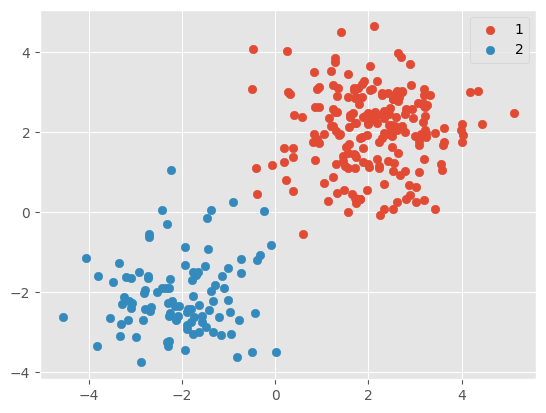

In [31]:
plt.scatter(x1[:, 0], x1[:, 1], label='1')
plt.scatter(x2[:, 0], x2[:, 1], label='2')
plt.legend()

In [29]:
model_kmeans = KMeans(n_clusters=2, random_state=SEED).fit(x)

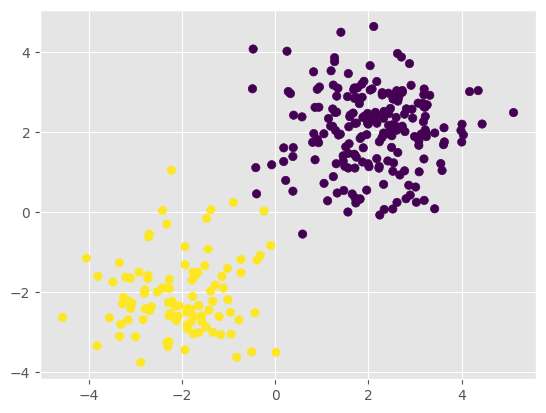

In [30]:
labels = model_kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')

## Get real data

In [94]:
csv_file = './data/mall_customers.csv'
df = pd.read_csv(csv_file)
print("# of rows: ", len(df))
df.head()

# of rows:  200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [100]:
# df_x = df[['Age', 'Annual Income (k$)']]
df_x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


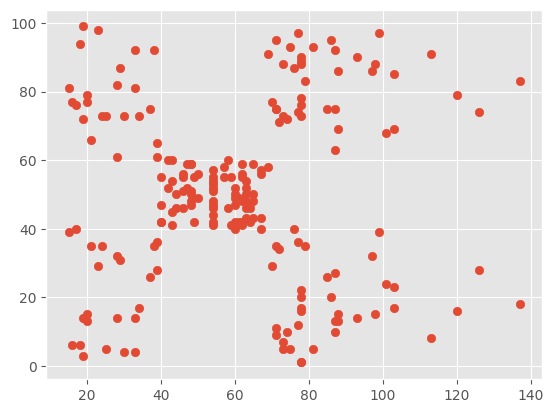

In [102]:
plt.scatter(df_x['Annual Income (k$)'], df_x['Spending Score (1-100)'])

## Compute k-Means inertia

Text(0, 0.5, 'Inertia')

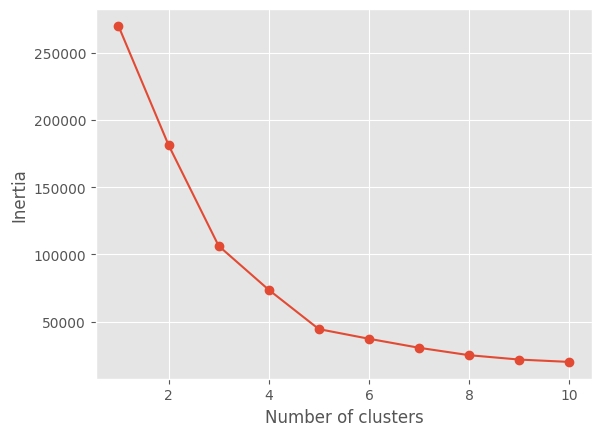

In [113]:
inertias = []
for n in range(1, 11):
    model_ = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001, random_state=SEED, algorithm='lloyd')
    model_ = model_.fit(df_x)
    inertias.append(model_.inertia_)
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Compute k-Means silhouette score to find the best k

Text(0.5, 0, 'Number of clusters')

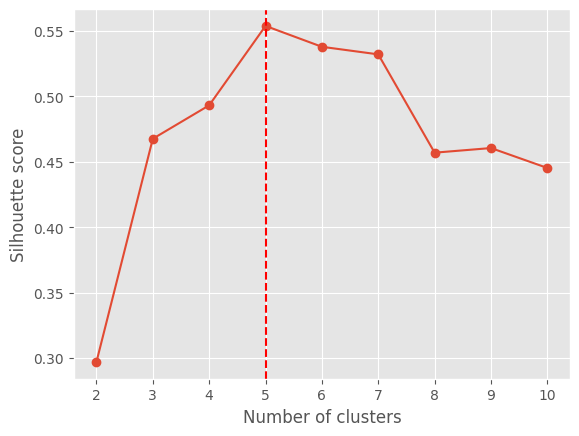

In [124]:
silhouette_scores = []
for n in range(2, 11):
    model_ = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001, random_state=SEED, algorithm='lloyd')
    model_ = model_.fit(df_x)
    silhouette_scores.append(silhouette_score(df_x, model_.labels_))

best_k = np.argmax(silhouette_scores) + 2
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--')
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')

## Fit k-Means with the best k

In [126]:
model_kmeans = KMeans(n_clusters=best_k, random_state=SEED).fit(df_x)

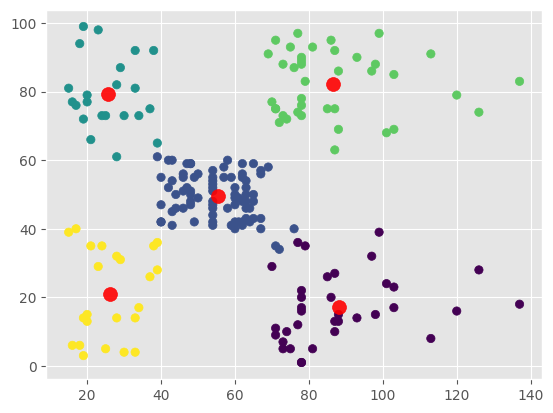

In [130]:
labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_
plt.scatter(df_x['Annual Income (k$)'], df_x['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.90)